<a href="https://colab.research.google.com/github/amrutahere08/IPLAnalysis/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from IPython.display import display

In [ ]:

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries (1).csv")
orange_cap = pd.read_csv("orange_cap.csv")
purple_cap = pd.read_csv("purple_cap.csv")



In [ ]:
# Fill missing values with empty strings
matches.fillna("", inplace=True)
deliveries.fillna("", inplace=True)

# Display column names for reference
print("Matches Columns:", matches.columns)
print("Deliveries Columns:", deliveries.columns)
print("orange_cap Columns:", orange_cap.columns)
print("purple_cap Columns:", purple_cap.columns)

Matches Columns: Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'balls_left', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')
Deliveries Columns: Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team',
       'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide',
       'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed',
       'fielder'],
      dtype='object')
orange_cap Columns: Index(['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs',
       'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds',
       'Fifties', 'Ducks', 'Fours', 'Sixes'],
      dtype='object')
purple_cap Columns: Index(['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs

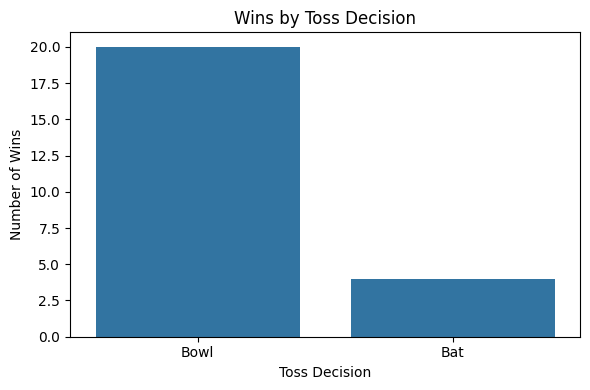

In [ ]:
# Win Percentage by Toss Decision (Field vs Bat First)
# Prepare data
decision_win = matches[matches['toss_winner'] == matches['match_winner']]
decision_counts = decision_win['toss_decision'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=decision_counts.index, y=decision_counts.values)
plt.title('Wins by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

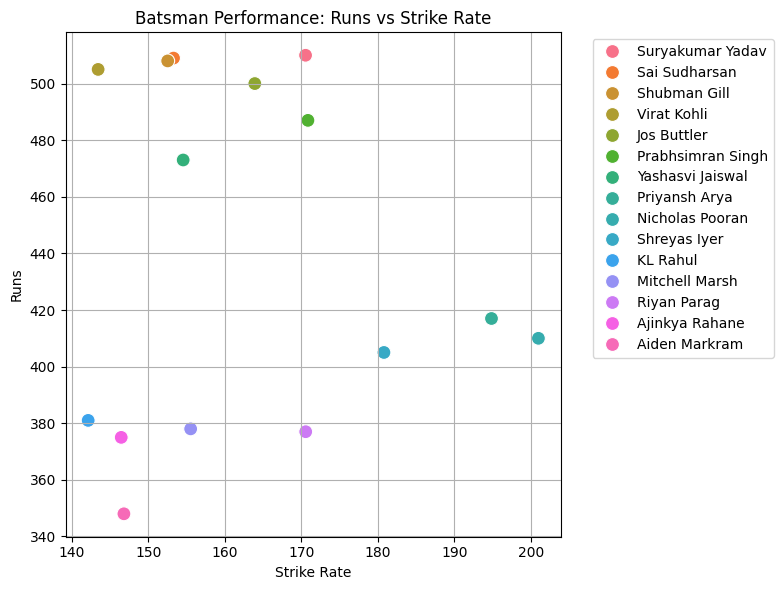

In [ ]:
#1. Batting Performance: Runs vs Strike Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=orange_cap, x='Strike_rate', y='Runs', hue='Batsman', s=100)
plt.title('Batsman Performance: Runs vs Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


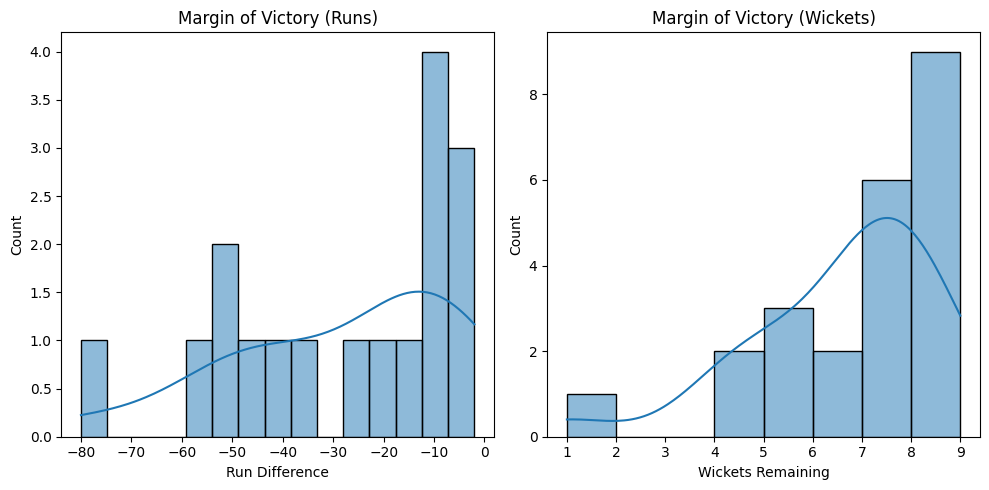

In [ ]:
#2. Win Margin Distribution (Runs vs Wickets)
# Separate wins by runs and wickets
runs_win = matches[matches['won_by'].str.contains('runs', na=False)]
wickets_win = matches[matches['won_by'].str.contains('wickets', na=False)]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(runs_win['second_ings_score'] - runs_win['first_ings_score'], bins=15, kde=True)
plt.title('Margin of Victory (Runs)')
plt.xlabel('Run Difference')

plt.subplot(1, 2, 2)
wickets_margin = wickets_win['won_by'].str.extract(r'(\d+)').astype(float)
sns.histplot(wickets_margin[0], bins=8, kde=True)
plt.title('Margin of Victory (Wickets)')
plt.xlabel('Wickets Remaining')

plt.tight_layout()
plt.show()


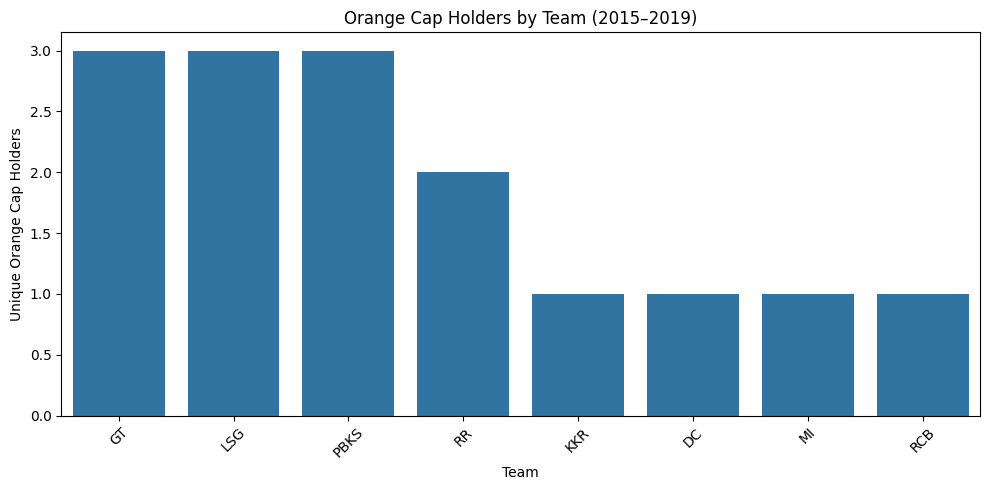

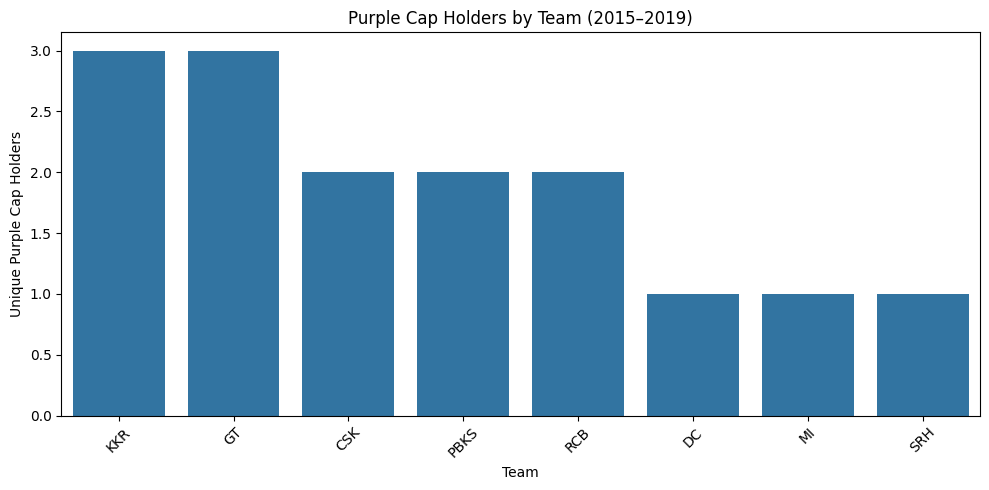

In [ ]:
# 3. Orange & Purple Cap Holders by Team (2015–2019)

# Filter data from 2015 to 2019
orange_filtered = orange_cap[orange_cap['Matches'] > 0]  # assuming all entries are from 2015–2019
purple_filtered = purple_cap[purple_cap['Matches'] > 0]

# Count unique Orange Cap holders per team
orange_team_counts = orange_filtered.groupby('Team')['Batsman'].nunique().sort_values(ascending=False)

# Count unique Purple Cap holders per team
purple_team_counts = purple_filtered.groupby('Team')['Bowler'].nunique().sort_values(ascending=False)

# Plotting Orange Cap distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=orange_team_counts.index, y=orange_team_counts.values)
plt.title("Orange Cap Holders by Team (2015–2019)")
plt.xlabel("Team")
plt.ylabel("Unique Orange Cap Holders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Purple Cap distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=purple_team_counts.index, y=purple_team_counts.values)
plt.title("Purple Cap Holders by Team (2015–2019)")
plt.xlabel("Team")
plt.ylabel("Unique Purple Cap Holders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Index(['Position', 'Player', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs',
       'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds',
       'Fifties', 'Ducks', 'Fours', 'Sixes', 'Label'],
      dtype='object')


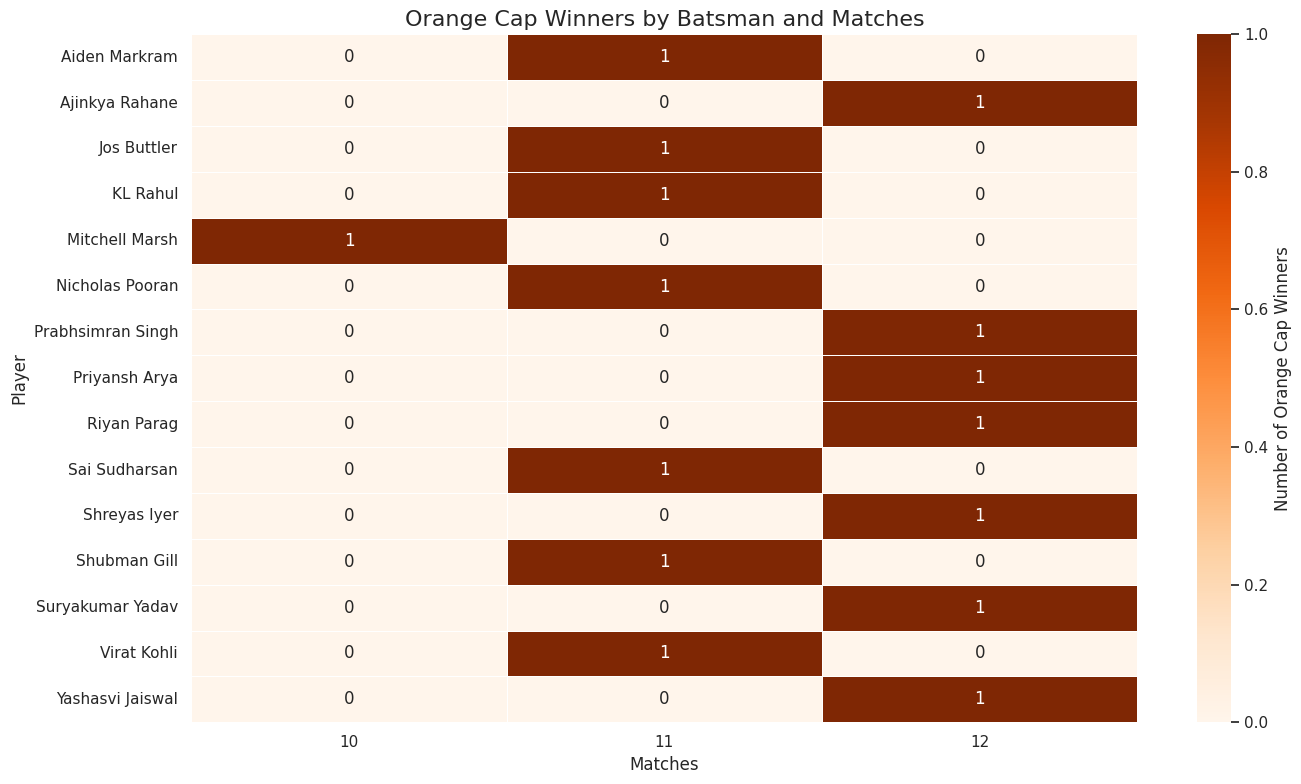

In [ ]:
#4. orange cap winner by players and matches

# Preview your columns
print(orange_cap.columns)

# Assuming these are the important ones: 'Season', 'Batsman', 'Team', 'Runs'
# Group to count how many times each team had an orange cap winner
orange_summary = orange_cap.groupby(['Matches', 'Player'])['Team'].count().reset_index()
orange_summary.columns = ['Matches', 'Player', 'Orange Cap Wins']

# Pivot for heatmap
pivot_df = orange_summary.pivot(index='Player', columns='Matches', values='Orange Cap Wins').fillna(0)

# Visual improvement: heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="Oranges", linewidths=0.5, cbar_kws={'label': 'Number of Orange Cap Winners'})

plt.title("Orange Cap Winners by players and Matches", fontsize=16)
plt.xlabel("Matches")
plt.ylabel("Player")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Index(['Position', 'Player', 'Team', 'Matches', 'Innings', 'Balls', 'Overs',
       'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate',
       'Four_wicket_haul', 'Five_wicket_hall', 'Label'],
      dtype='object')


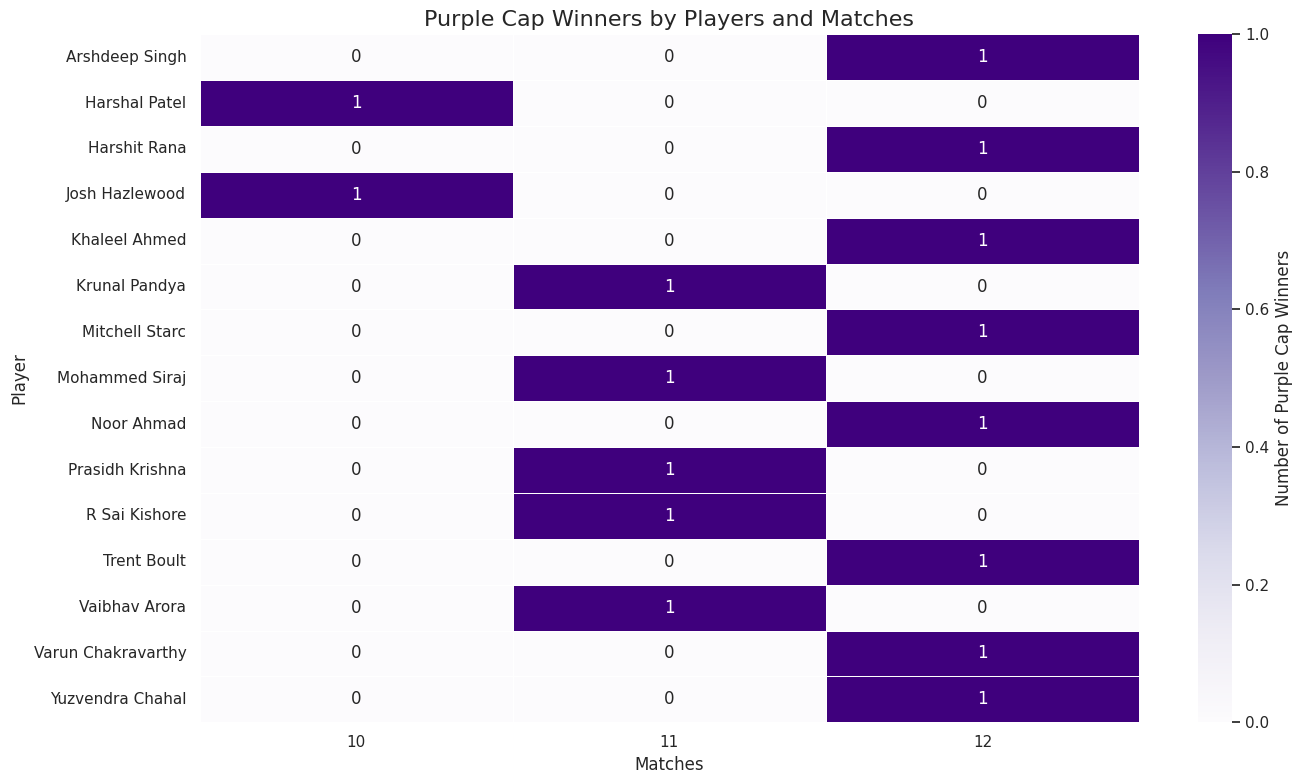

In [ ]:
#5.purple cap winner by players and Matches

# Preview columns
print(purple_cap.columns)

# Assuming these columns exist: 'Season', 'Bowler', 'Team', 'Wickets'
# Group by season and team
purple_summary = purple_cap.groupby(['Matches', 'Player'])['Team'].count().reset_index()
purple_summary.columns = ['Matches', 'Player', 'Purple Cap Wins']

# Pivot table for heatmap
pivot_purple = purple_summary.pivot(index='Player', columns='Matches', values='Purple Cap Wins').fillna(0)

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_purple, annot=True, fmt=".0f", cmap="Purples", linewidths=0.5, cbar_kws={'label': 'Number of Purple Cap Winners'})

plt.title("Purple Cap Winners by Players and Matches", fontsize=16)
plt.xlabel("Matches")
plt.ylabel("Player")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


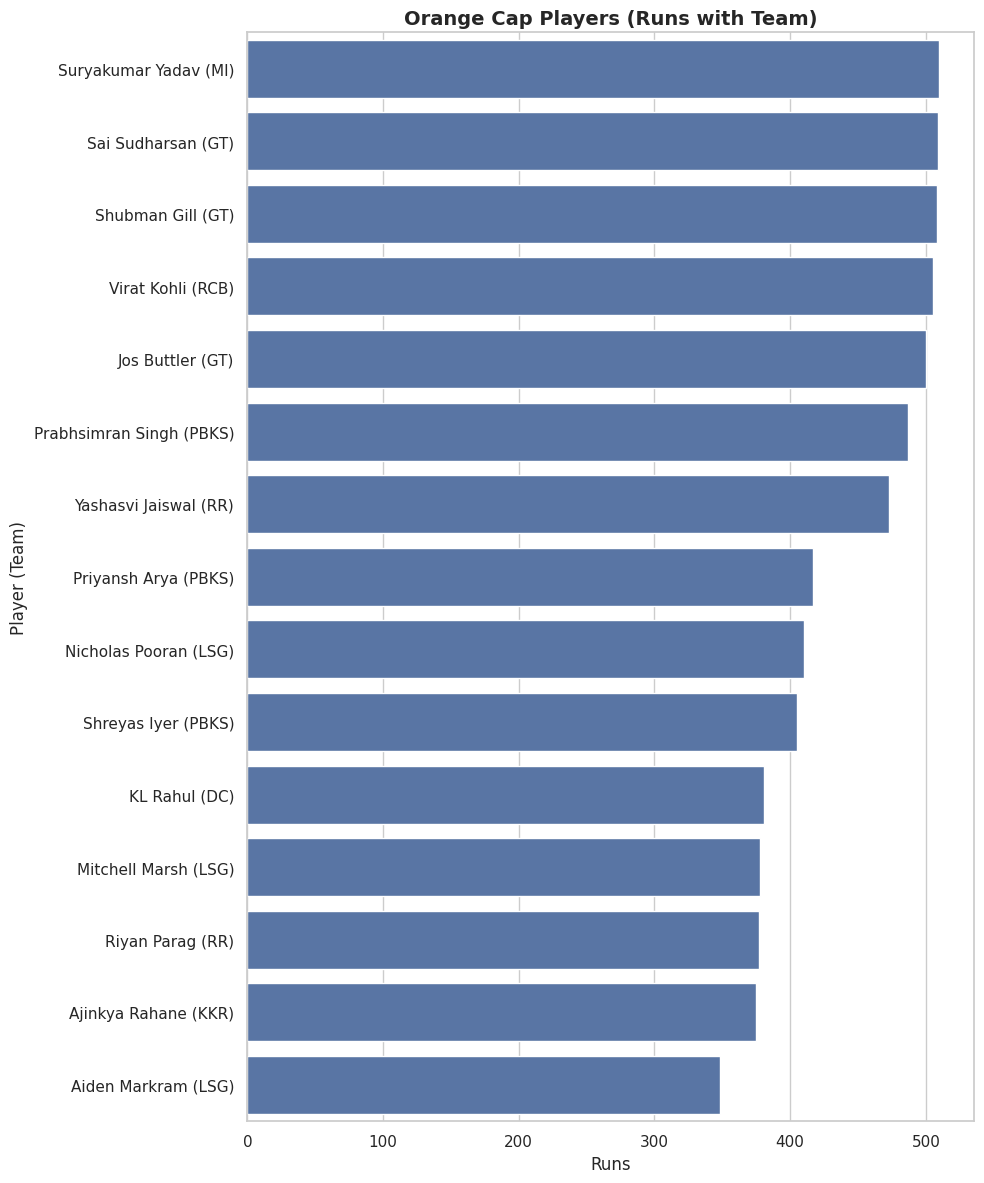

In [ ]:
#6. visualization of orange cap players
#Prepare data
orange_cap = orange_cap.rename(columns={'Batsman': 'Player'})
orange_cap['Label'] = orange_cap['Player'] + ' (' + orange_cap['Team'] + ')'

# Set style
sns.set(style="whitegrid")

# Create figure
fig, axs = plt.subplots(figsize=(10, 12))

# Orange Cap bar plot
sns.barplot(y='Label', x='Runs', data=orange_cap, ax=axs)
axs.set_title('Orange Cap Players (Runs with Team)', fontsize=14, fontweight='bold')
axs.set_xlabel('Runs')
axs.set_ylabel('Player (Team)')

plt.tight_layout()
plt.show()

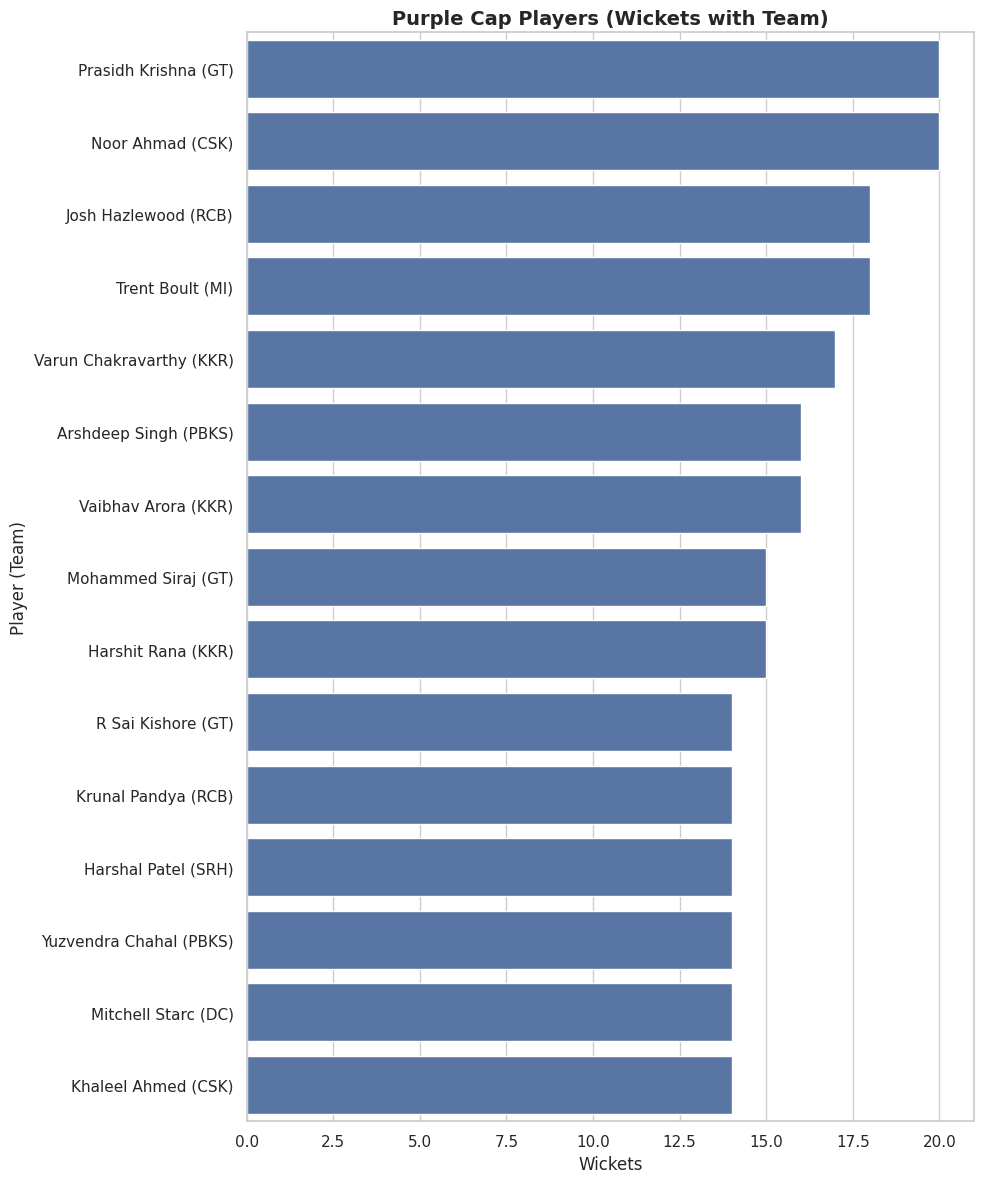

In [ ]:
#7.visualization of purple cap players
# Prepare data
purple_cap = purple_cap.rename(columns={'Bowler': 'Player'})
purple_cap['Label'] = purple_cap['Player'] + ' (' + purple_cap['Team'] + ')'

# Set style
sns.set(style="whitegrid")

# Create figure for Purple Cap only
fig, ax = plt.subplots(figsize=(10, 12))

# Purple Cap Plot
sns.barplot(y='Label', x='Wickets', data=purple_cap, ax=ax)
ax.set_title('Purple Cap Players (Wickets with Team)', fontsize=14, fontweight='bold')
ax.set_xlabel('Wickets')
ax.set_ylabel('Player (Team)')

plt.tight_layout()
plt.show()


In [ ]:
#8. counting the players who performed well by POTM from 2015 to 2019
# Load the dataset
df = pd.read_csv('match.csv')

# Filter data for years 2015 to 2019
df_2015_2019 = df[df['season'].between(2015, 2019)]

# Get all unique player names from 'player_of_match' column
players = df_2015_2019['player_of_match'].unique()

# Initialize a dictionary to store player run totals
player_runs = {}

# Since the dataset doesn't contain actual runs scored by each player,
# we'll count how many times each player was "Player of the Match" (POTM)
# as a proxy for their performance (since POTM is typically awarded to top performers)

for player in players:
    # Count how many times each player was POTM
    count = len(df_2015_2019[df_2015_2019['player_of_match'] == player])
    player_runs[player] = count  # Using count as a proxy for performance

# Sort players by their POTM count (descending)
sorted_players = sorted(player_runs.items(), key=lambda x: x[1], reverse=True)

# Filter players who were POTM more than once (as a proxy for scoring above 50 runs multiple times)
# Note: This is an approximation since we don't have actual run data
top_players = [(player, count) for player, count in sorted_players if count > 1]

# Display results
print("Players who performed well (Player of Match multiple times) from 2015-2019:")
print("-" * 70)
print("{:<30} {:<15}".format("Player Name", "POTM Count"))
print("-" * 70)
for player, count in top_players:
    print("{:<30} {:<15}".format(player, count))

# Note: For actual run analysis, we would need a dataset with batting statistics
# This analysis uses POTM as a performance indicator since run data isn't available

Players who performed well (Player of Match multiple times) from 2015-2019:
----------------------------------------------------------------------
Player Name                    POTM Count     
----------------------------------------------------------------------
AB de Villiers                 10             
RG Sharma                      9              
AD Russell                     8              
Rashid Khan                    7              
V Kohli                        7              
SR Watson                      7              
MS Dhoni                       6              
DA Warner                      6              
RR Pant                        6              
JJ Bumrah                      5              
SP Narine                      5              
JC Buttler                     5              
S Dhawan                       5              
HH Pandya                      5              
N Rana                         4              
SV Samson                     

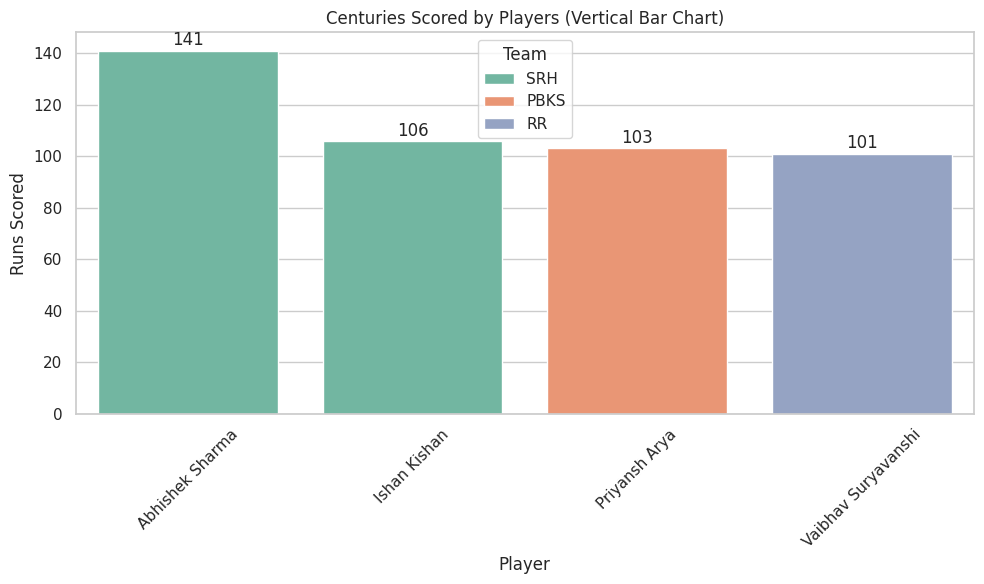

In [ ]:

#9.plyares who scored centuries in 2025
# Add total runs column
deliveries['total_runs'] = deliveries['runs_of_bat'] + deliveries['extras']

# Group by match and player to calculate runs per match
runs_per_player_match = deliveries.groupby(['match_no', 'striker', 'batting_team'])['runs_of_bat'].sum().reset_index()

# Filter players who scored centuries (100 or more)
centuries = runs_per_player_match[runs_per_player_match['runs_of_bat'] >= 100]

# Get only the necessary columns for the plot
century_player_names = centuries[['striker', 'batting_team', 'runs_of_bat']].sort_values(by='runs_of_bat', ascending=False).reset_index(drop=True)

# Set the style
sns.set(style="whitegrid")

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='striker', y='runs_of_bat', data=century_player_names, hue='batting_team', dodge=False, palette='Set2')

# Annotate scores above bars
for index, row in century_player_names.iterrows():
    plt.text(index, row['runs_of_bat'] + 2, str(row['runs_of_bat']), ha='center')

plt.title('Centuries Scored by Players (Vertical Bar Chart)')
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()


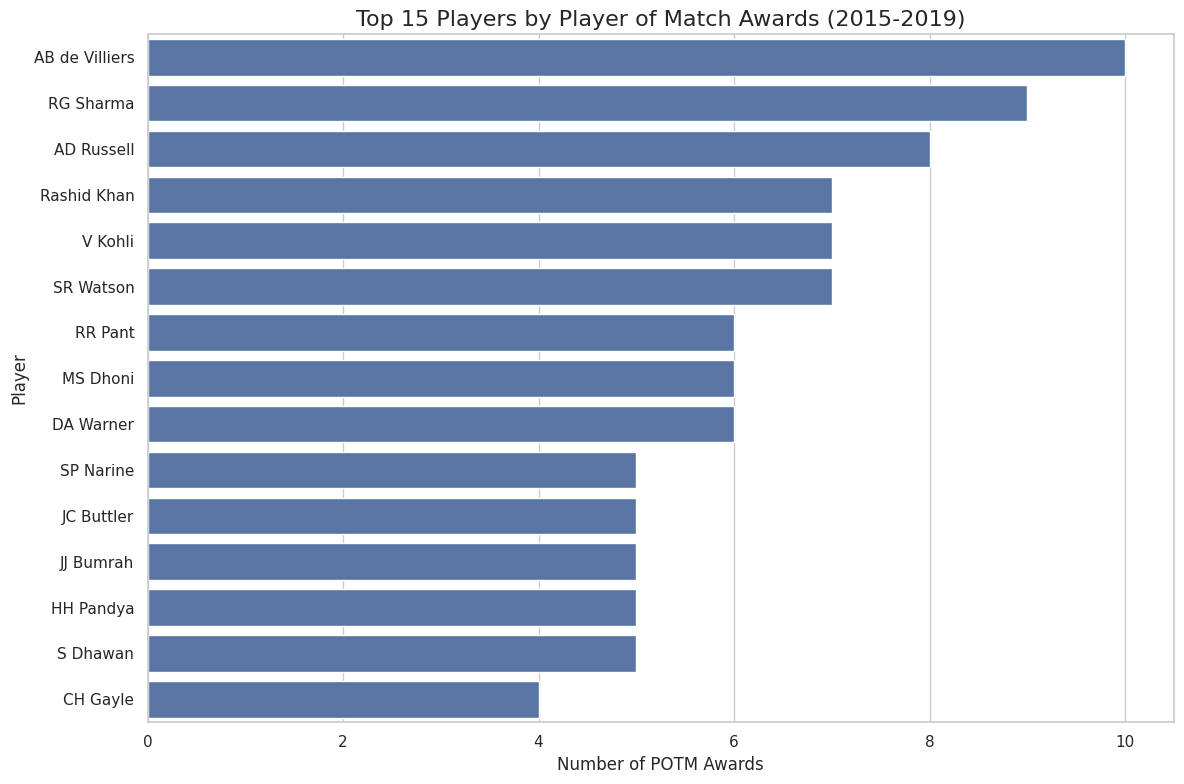

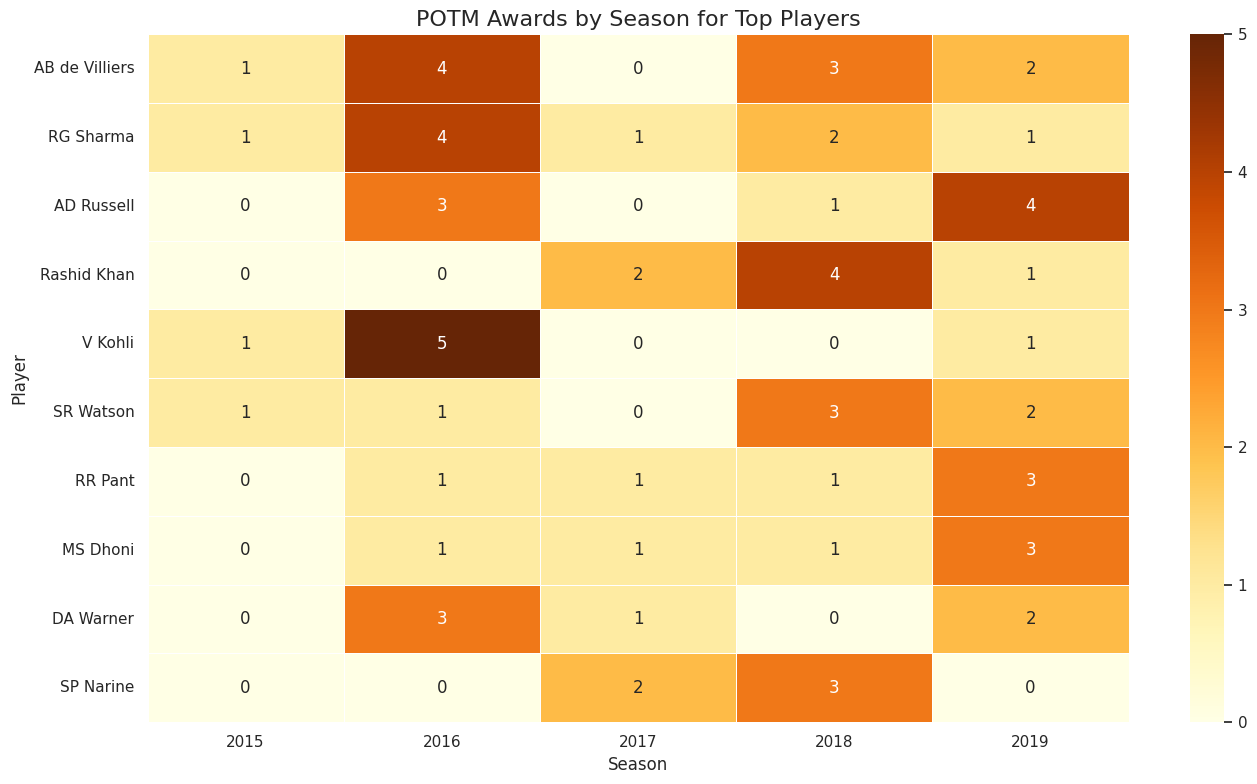

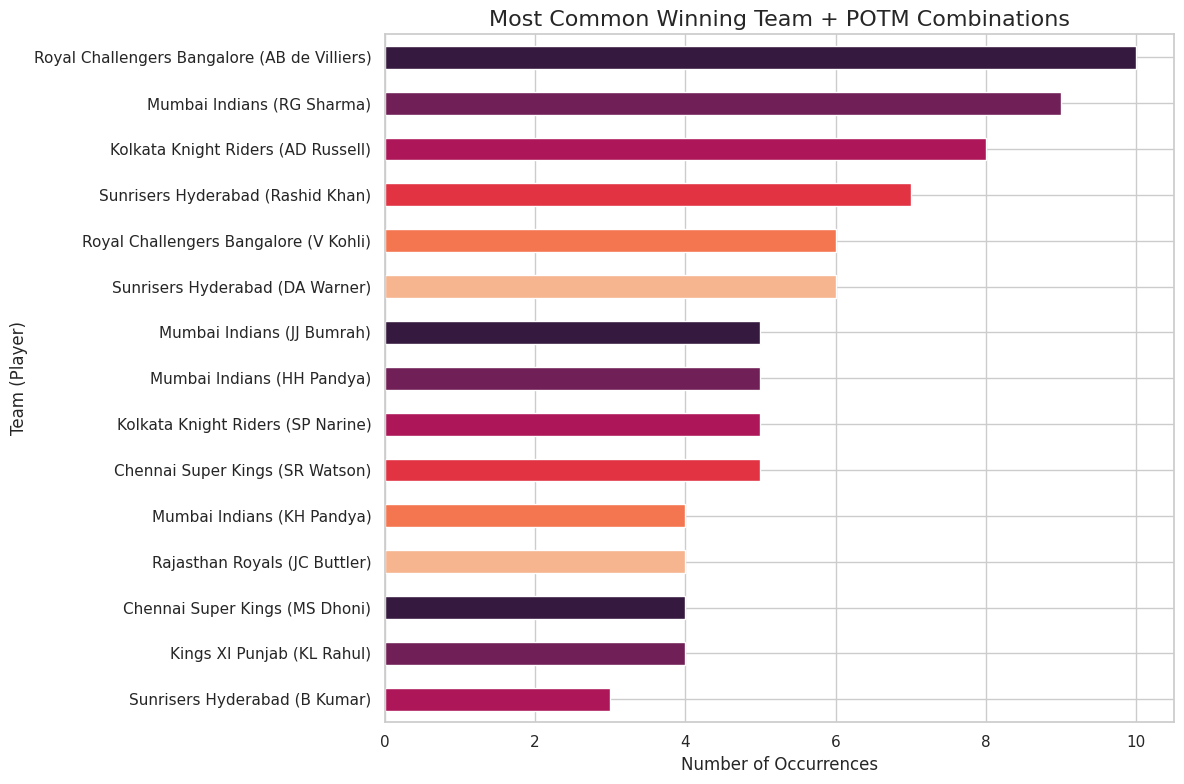

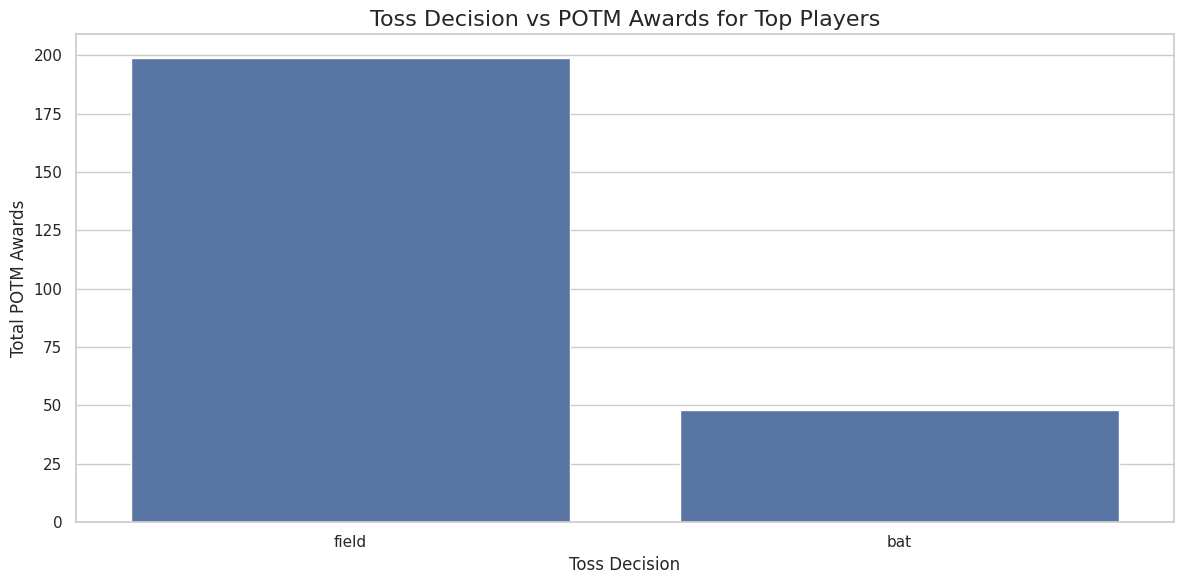


Top Performers (Player of Match) 2015-2019:


,Player,POTM_Awards
0,AB de Villiers,10
1,RG Sharma,9
2,AD Russell,8
3,Rashid Khan,7
4,V Kohli,7
5,SR Watson,7
6,RR Pant,6
7,MS Dhoni,6
8,DA Warner,6
9,SP Narine,5



Additional Insights:
- Total matches analyzed: 249
- Unique players awarded POTM: 105
- Most POTM awards in a single season: 5.0


In [ ]:

#10.visualization of players by POTM from 2015 to 2019
# Load the dataset
df = pd.read_csv('match.csv')

# Filter data for years 2015 to 2019
df_2015_2019 = df[df['season'].between(2015, 2019)].copy()

# 1. Player of the Match Analysis
potm_counts = df_2015_2019['player_of_match'].value_counts().reset_index()
potm_counts.columns = ['Player', 'POTM_Awards']
top_potm = potm_counts[potm_counts['POTM_Awards'] > 1]

# Visualization 1: Top Players by POTM Awards (Bar Plot)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_potm.head(15), x='POTM_Awards', y='Player')
plt.title('Top 15 Players by Player of Match Awards (2015-2019)', fontsize=16)
plt.xlabel('Number of POTM Awards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 2: POTM Awards by Season (Heatmap)
potm_by_season = df_2015_2019.groupby(['season', 'player_of_match']).size().unstack().fillna(0)
top_players_list = top_potm['Player'].head(10)
potm_top_by_season = potm_by_season[top_players_list]

plt.figure(figsize=(14, 8))
sns.heatmap(potm_top_by_season.T, annot=True, fmt='g', cmap='YlOrBr', linewidths=.5)
plt.title('POTM Awards by Season for Top Players', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 3: Team Performance with Top Players
df_2015_2019['winning_team_with_player'] = df_2015_2019['winner'] + " (" + df_2015_2019['player_of_match'] + ")"
top_team_combos = df_2015_2019['winning_team_with_player'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_team_combos.plot(kind='barh', color=sns.color_palette('rocket'))
plt.title('Most Common Winning Team + POTM Combinations', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Team (Player)', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualization 4: Toss Decision Impact on POTM
toss_potm = df_2015_2019.groupby(['toss_decision', 'player_of_match']).size().unstack().fillna(0)
toss_potm['Total'] = toss_potm.sum(axis=1)
toss_potm = toss_potm.sort_values('Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=toss_potm.reset_index(), x='toss_decision', y='Total')
plt.title('Toss Decision vs POTM Awards for Top Players', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Total POTM Awards', fontsize=12)
plt.tight_layout()
plt.show()

# Interactive Table Display
print("\nTop Performers (Player of Match) 2015-2019:")
display(top_potm.style.background_gradient(cmap='Blues'))

# Additional Metrics
print("\nAdditional Insights:")
print(f"- Total matches analyzed: {len(df_2015_2019)}")
print(f"- Unique players awarded POTM: {len(potm_counts)}")
print(f"- Most POTM awards in a single season: {potm_by_season.max().max()}")

In [ ]:
#11. Player-Level Analysis: Quantify Individual Impact
# Top 10 players by POTM awards (2015-2019)
df = pd.read_csv('match.csv')
top_players = df[df['season'].between(2015, 2019)]['player_of_match'].value_counts().head(10)
print(top_players.head())

player_of_match
AB de Villiers    10
RG Sharma          9
AD Russell         8
Rashid Khan        7
V Kohli            7
Name: count, dtype: int64


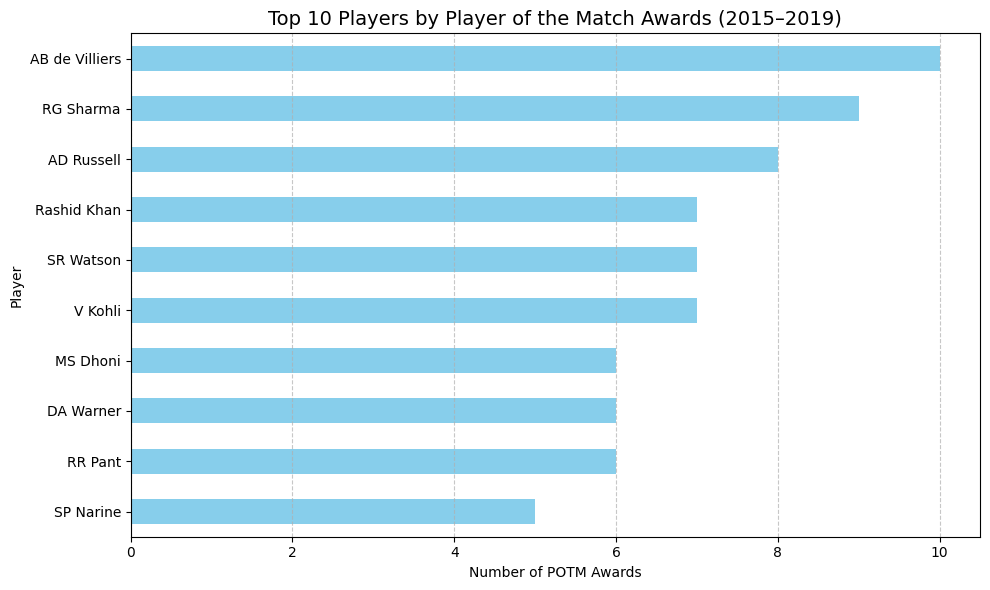

In [ ]:

top_players = df[df['season'].between(2015, 2019)]['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_players.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Players by Player of the Match Awards (2015–2019)', fontsize=14)
plt.xlabel('Number of POTM Awards')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
